# Data Processing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datasetRetail = pd.read_excel('Online_retail.xlsx')

# Group the dataset by CustomerID
customers_grouped = datasetRetail.groupby('CustomerID')

# Creates an empty dictionary to store the items bought by each customer
# ID : Description, Quantity
customer_items = {}

# Iterates through each customer
for customer_id, group_data in customers_grouped:

    # Checks if customer_id is already in dictionary
    if not (customer_id in customer_items.keys()):
        customer_items[customer_id] = []

    # For each costumer_id, it adds the product to that costumer
    for i in range(len(group_data["Country"].values)):
        dataset_values = {
                          "Description": group_data["Description"].values[i],
                          "Quantity": group_data["Quantity"].values[i]
                          }

        if(group_data["Quantity"].values[i] > 0):
            customer_items[customer_id].append(dataset_values)

In [2]:
#----------------- Accounting total registrations, null CustomerID and Products reimbursed -----------------#

# Accouting total registrations
total_registrations = len(datasetRetail)
print(f'Total registrations: {total_registrations}')

# Checks if CustomerID is null and counts it if true
category_counts_nullIDs = (datasetRetail['CustomerID'].isna()).sum()
print(f'Number of Customers with ID null: {category_counts_nullIDs}') #135080 null CustomerID's


category_counts_products_reimbursed = (datasetRetail['Quantity'] <= 0).sum()
print(f'Number of products reimbursed: {category_counts_products_reimbursed}') #10624 products reimbursed

#---------------- Rate Products reimbursed ----------------#

reimbursement_rate = (category_counts_products_reimbursed / len(datasetRetail['InvoiceNo'])) * 100
print(f'Rate of products reimbursed: {reimbursement_rate}') #1.9604767590130447

#---------------- Rate Purchases with no CustomerID ----------------#

noClientID_rate = (category_counts_nullIDs / len(datasetRetail['CustomerID'])) * 100
print(f'Rate of purchased with no CustomerID: {noClientID_rate}') #24.926694334288598

Total registrations: 541909
Number of Customers with ID null: 135080
Number of products reimbursed: 10624
Rate of products reimbursed: 1.9604767590130447
Rate of purchased with no CustomerID: 24.926694334288598


# Data Cleaning

In [3]:
#----------------- Filtering the DataFrame -----------------#

# Filter the DataFrame where 'Quantity' needs to be greater than 0 (531285) and CustomerID not null (406829)
filtered_data_quantity = datasetRetail[(datasetRetail['Quantity'] > 0) & (~datasetRetail['CustomerID'].isna())]
print(f'Final number of rows based on the filtration made: {len(filtered_data_quantity)}') #397924

Final number of rows based on the filtration made: 397924


# Data Overview

In [4]:
#----------------- Distinct Product Count  -----------------#

# Check if any rows satisfy the condition
if not filtered_data_quantity.empty:
    category_counts_stockcode = filtered_data_quantity['StockCode'].value_counts()
    print(f'Number of different products: {len(category_counts_stockcode)}') #3665

Number of different products: 3665


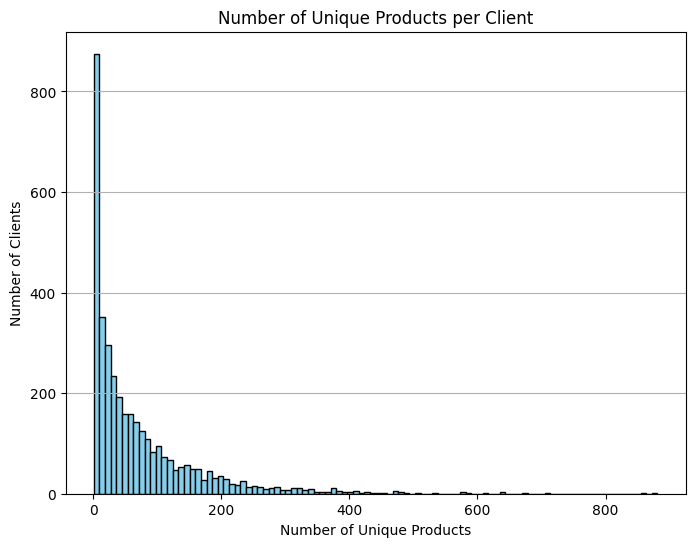

Q1 Quantile: 11.0
Q2 Quantile: 40.0
Q3 Quantile: 100.0


In [7]:
unique_products_per_client = filtered_data_quantity.groupby('StockCode')['CustomerID'].nunique()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(unique_products_per_client, bins=100, color='skyblue', edgecolor='black')
plt.title('Number of Unique Products per Client')
plt.xlabel('Number of Unique Products')
plt.ylabel('Number of Clients')
plt.grid(axis='y')
plt.show()

# Calculate quantis (25%,50%,75%)
print(f'Q1 Quantile: {np.quantile(unique_products_per_client, .25)}')
print(f'Q2 Quantile: {np.quantile(unique_products_per_client, .50)}')
print(f'Q3 Quantile: {np.quantile(unique_products_per_client, .75)}')


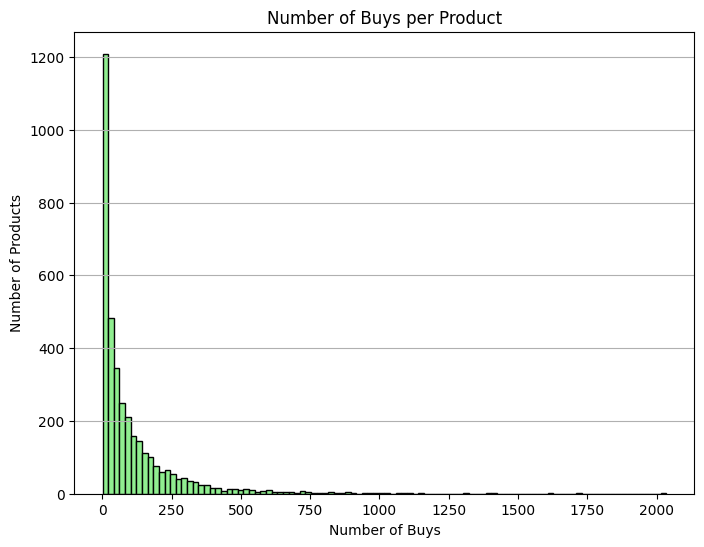

Q1 Quantile: 12.0
Q2 Quantile: 49.0
Q3 Quantile: 135.0


In [4]:
# Count the number of purchases for each product
buys_per_product = filtered_data_quantity['StockCode'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(buys_per_product, bins=100, color='lightgreen', edgecolor='black')
plt.title('Number of Buys per Product')
plt.xlabel('Number of Buys')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.show()

# Calculate quantis (25%,50%,75%)
print(f'Q1 Quantile: {np.quantile(buys_per_product, .25)}')
print(f'Q2 Quantile: {np.quantile(buys_per_product, .50)}')
print(f'Q3 Quantile: {np.quantile(buys_per_product, .75)}')

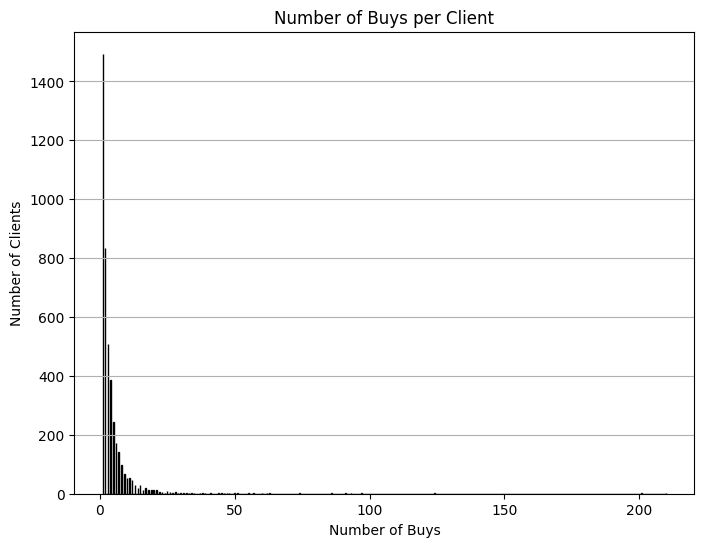

Q1 Quantile: 1.0
Q2 Quantile: 2.0
Q3 Quantile: 5.0


In [6]:
# Group by CustomerID and count the number of products for each customer
products_per_client = filtered_data_quantity.groupby('CustomerID')['InvoiceNo'].nunique()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(products_per_client, bins=1000, color='skyblue', edgecolor='black')
plt.title('Number of Buys per Client')
plt.xlabel('Number of Buys')
plt.ylabel('Number of Clients')
plt.grid(axis='y')
plt.show()

# Calculate quantis (25%,50%,75%)
print(f'Q1 Quantile: {np.quantile(products_per_client, .25)}')
print(f'Q2 Quantile: {np.quantile(products_per_client, .50)}')
print(f'Q3 Quantile: {np.quantile(products_per_client, .75)}')

In [10]:
#----------------- Distinct Countries -----------------#

# Counts the different countries through the dataset
category_counts_country = filtered_data_quantity['Country'].value_counts()
print(f'Number of different countries: {len(category_counts_country)}') #37

Number of different countries: 37


In [11]:
#----------------- Distinct Client Count -----------------#

# Counts the different clients through the dataset
category_counts_customerID = filtered_data_quantity['CustomerID'].value_counts()
print(f'Number of different clients: {len(category_counts_customerID)}') #4339

Number of different clients: 4339


In [12]:
#----------------- Distinct Purchases Done -----------------#

category_counts_invoiceNo = filtered_data_quantity['InvoiceNo'].value_counts()
print(f'Number of different purchases done: {len(category_counts_invoiceNo)}')
#Purchases reimbursed: 5172

Number of different purchases done: 18536


In [13]:
#---------------- Scatter Plot Purchases ----------------#

#TODO - Find another way to scatterplot; Still testing

# Example of a count plot for StockCode
sns.countplot(x="StockCode", data=filtered_data_quantity)
plt.show()

# Example of a count plot for CustomerID
sns.countplot(x="CustomerID", data=filtered_data_quantity)
plt.show()

# Example of a count plot for InvoiceNo
sns.countplot(x="InvoiceNo", data=filtered_data_quantity)
plt.show()


#purchases_variables = filtered_data_quantity[["StockCode", "CustomerID", "InvoiceNo", "InvoiceDate"]]
#pd.plotting.scatter_matrix(purchases_variables)

KeyboardInterrupt: 

C:\Users\João Serras\AppData\Local\Temp\ipykernel_13372\1979228039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_quantity['InvoiceDate'] = pd.to_datetime(filtered_data_quantity['InvoiceDate']) #.dt.date


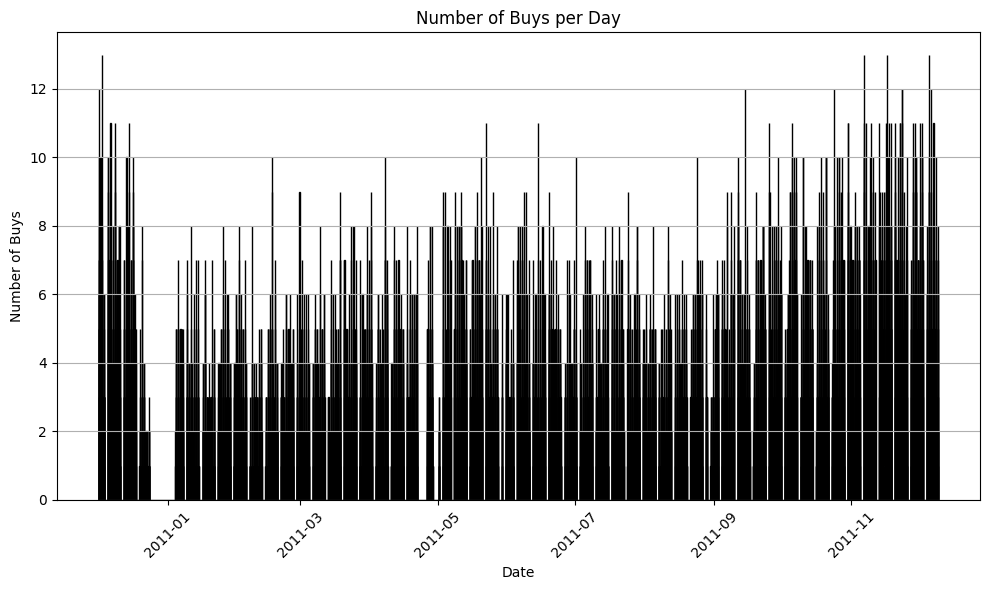

In [14]:
# Still testing, code not ready yet!

filtered_data_quantity['InvoiceDate'] = pd.to_datetime(filtered_data_quantity['InvoiceDate']) #.dt.date

#Group by PurchaseDate and count the number of buys for each day
buys_per_day = filtered_data_quantity['InvoiceDate'].value_counts().sort_index() # Remove sort_index()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(buys_per_day.index, bins=len(buys_per_day), color='skyblue', edgecolor='black')
plt.title('Number of Buys per Day')
plt.xlabel('Date')
plt.ylabel('Number of Buys')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Data Sampling

In [15]:
#----------------- Customer Distinction  -----------------#

#TODO - Modify this

# Through the dataset, we check what type of clients we have.
# In a year, if a client made below 100 purchases, we consider as a normal client
# In a year, if a client made between 100 and 364 purchases, we consider as a daily client
# In a year, if a client made between 365 and 7962 purchases, we consider as big client
normal_clients = 0
daily_clients = 0
big_clients = 0

for client_id, purchases in customer_items.items():
    if len(purchases) < 100:
        normal_clients += 1
    elif 100 <= len(purchases) < 365:
        daily_clients += 1
    elif 365 <= len(purchases) < 7963:
        big_clients += 1
    else:
        print(f"Error for ClientID {client_id}: Unexpected number of purchases - {len(purchases)}")

print(normal_clients)
print(daily_clients)
print(big_clients)

3281
929
162


# Network Creation

In [14]:
#----------------- Client-Product Relation -----------------#

customer_data = []

for id in customer_items.keys():
    for customer_item in customer_items.get(id):
        array_values = {
            "CustomerID" : id,
            "Description" : customer_item["Description"],
            "Quantity" : customer_item["Quantity"]
        }
        customer_data.append(array_values)

output_dataframe = pd.DataFrame(customer_data)
output_dataframe

,CustomerID,Description,Quantity
0,12346.0,MEDIUM CERAMIC TOP STORAGE JAR,74215
1,12347.0,BLACK CANDELABRA T-LIGHT HOLDER,12
2,12347.0,AIRLINE BAG VINTAGE JET SET BROWN,4
3,12347.0,COLOUR GLASS. STAR T-LIGHT HOLDER,12
4,12347.0,MINI PAINT SET VINTAGE,36
...,...,...,...
397919,18287.0,LIPSTICK PEN RED,12
397920,18287.0,HAND WARMER SCOTTY DOG DESIGN,12
397921,18287.0,SET OF 3 WOODEN SLEIGH DECORATIONS,36
397922,18287.0,PAINTED METAL STAR WITH HOLLY BELLS,48


In [15]:
#----------------- Product-Product Relation -----------------#

# Agroup the data by customerID, StockCode and their quantity
output_agg = datasetRetail.groupby(['CustomerID', 'StockCode']).agg({'Quantity': 'sum'})

# Creates the correct index
output_agg.reset_index(inplace=True)

# Merge the dataframe to create the relation needed
output_agg = pd.merge(output_agg, output_agg, how='inner', on='CustomerID')

# Filters the output, where it only gives the products that are different
result_df = output_agg[output_agg['StockCode_x'] != output_agg['StockCode_y']]

# Get the dataframe with only the products
result_df = result_df[['StockCode_x', 'StockCode_y']]

result_df


,StockCode_x,StockCode_y
2,16008,17021
3,16008,20665
4,16008,20719
5,16008,20780
6,16008,20782
...,...,...
48278165,85040A,72351A
48278166,85040A,72351B
48278167,85040A,84507C
48278168,85040A,85039A


In [3]:
#----------------- Client-Client Relation -----------------#

# Agroup the data by customerID, StockCode and their quantity
output_agg_cc = datasetRetail.groupby(['CustomerID', 'StockCode']).agg({'Quantity': 'sum'})

# Creates the correct index
output_agg_cc.reset_index(inplace=True)

# Merge the dataframe to create the relation needed
output_agg_cc = pd.merge(output_agg_cc, output_agg_cc, how='inner', on='StockCode')

# Filters the output, where it only gives the clients that are different
result_df_cc = output_agg_cc[output_agg_cc['CustomerID_x'] != output_agg_cc['CustomerID_y']]

# Get the dataframe with only the products
result_df_cc = result_df_cc[['CustomerID_x', 'CustomerID_y']]

result_df_cc

,CustomerID_x,CustomerID_y
1,12346.0,12409.0
2,12346.0,12415.0
3,12346.0,12433.0
4,12346.0,12607.0
5,12346.0,12688.0
...,...,...
50471918,18101.0,17841.0
50471930,17955.0,17972.0
50471931,17972.0,17955.0
50471935,17976.0,18011.0


In [4]:
#----------------- Export Results -----------------#

#file_path_cp = 'Client-Product.csv'

#output_dataframe.to_csv(file_path_cp, index=False)

#file_path_pp = 'Product-Product.csv'

#result_df.to_csv(file_path_pp, index=False)

file_path_cc = 'Client-Client.csv'

result_df_cc.to_csv(file_path_cc, index=False)